In [38]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [3]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [4]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [5]:
# response['data']

# Fetching the data from API

In [6]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [7]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [8]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
14047,YT,2022-11-06,5578,5
14048,YT,2022-11-07,5581,3
14049,YT,2022-11-08,5582,1
14050,YT,2022-11-09,5582,0


In [9]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [10]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13935,YT,2022-11-01,32,0
13936,YT,2022-11-02,32,0
13937,YT,2022-11-03,32,0
13938,YT,2022-11-04,32,0


In [11]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [12]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13815,YT,2022-11-13,0,0
13816,YT,2022-11-14,0,0
13817,YT,2022-11-15,0,0
13818,YT,2022-11-16,0,0


In [13]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13068,YT,2022-11-01,5556,3,32,0,0,0
13069,YT,2022-11-02,5560,4,32,0,0,0
13070,YT,2022-11-03,5564,4,32,0,0,0
13071,YT,2022-11-04,5566,2,32,0,0,0


In [14]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13068,YT,2022-11-01,5556,3,32,0,0,0
13069,YT,2022-11-02,5560,4,32,0,0,0
13070,YT,2022-11-03,5564,4,32,0,0,0
13071,YT,2022-11-04,5566,2,32,0,0,0


In [15]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
2036,BC,2022-09-08,383262,110,4183,0,324,18,1.091,0.000
8193,ON,2020-11-28,116407,1722,3669,20,595,36,3.152,1.161
9899,PE,2022-06-07,38686,632,35,2,11,0,0.090,0.316
12395,YT,2020-12-28,70,0,1,0,0,0,1.429,NaN
1201,BC,2020-05-26,2517,5,161,0,37,0,6.397,0.000
6792,NT,2021-06-12,128,0,0,0,0,0,0.000,NaN
5558,NS,2020-11-12,1134,0,65,0,0,0,5.732,NaN
7083,NT,2022-03-30,10779,100,21,0,0,0,0.195,0.000
1209,BC,2020-06-03,2597,3,166,1,32,1,6.392,33.333
6628,NT,2020-12-30,24,0,0,0,0,0,0.000,NaN


In [16]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [17]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [18]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [19]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [20]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6294,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0
9041,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0
7157,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0
6295,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0
9042,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0


In [21]:
# Assumptions made recovered data/Cured data was not available in the API so we assumed to use the cumulative hospitalizations cases to calculate the cumulative active cases
covid_dataframe_df['Cumulative Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df['Active Cases per day'] = covid_dataframe_df['Confirmed cases per day'] - (covid_dataframe_df['Deaths per day'] + covid_dataframe_df['hospitalizations per day'])
covid_dataframe_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Cumulative Active Cases,Active Cases per day
12106,SK,2022-11-13,147413,0,1649,0,147,0,1.119,0.000,145617,0
12468,YT,2021-03-11,86,0,1,0,0,0,1.163,0.000,85,0
9201,PE,2020-07-09,33,1,0,0,0,0,0.000,0.000,33,1
1733,BC,2021-11-09,210576,566,2223,5,426,19,1.056,0.883,207927,542
6594,NT,2020-11-26,15,0,0,0,0,0,0.000,0.000,15,0
7980,ON,2020-04-29,17489,406,1498,67,989,25,8.565,16.502,15002,314
7182,NU,2020-02-25,0,0,0,0,0,0,0.000,0.000,0,0
4436,NL,2020-06-21,261,0,3,0,0,0,1.149,0.000,258,0
9211,PE,2020-07-19,36,0,0,0,0,0,0.000,0.000,36,0
12315,YT,2020-10-09,20,0,0,0,0,0,0.000,0.000,20,0


# COVID-19 Cumulative Active Cases per Province

In [22]:
Active_cases_per_province = covid_dataframe_df.groupby('Province').max()[['Cumulative Active Cases', 'Date']].sort_values(['Cumulative Active Cases'], ascending = False).reset_index()
# Active_cases_per_province = Active_cases_per_province.iloc[0:5]
Active_cases_per_province_df = Active_cases_per_province[['Province', 'Cumulative Active Cases']]
Active_cases_per_province_df = Active_cases_per_province_df.set_index('Province')
Active_cases_per_province_df.head(13)

,Cumulative Active Cases
Province,
ON,1588656
QC,1303256
AB,624706
BC,392454
MB,152384
SK,145617
NB,83576
NS,73053
PE,53893


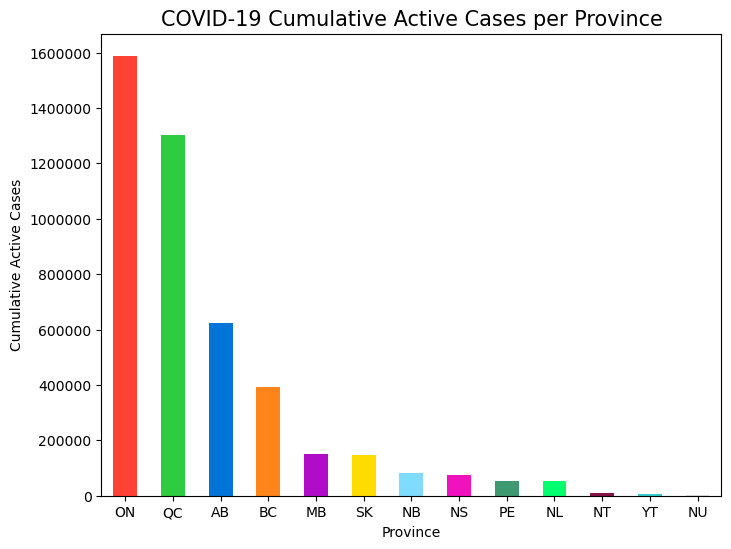

In [23]:
# set the colors for the bars
colors = ['#FF4136', '#2ECC40', '#0074D9', '#FF851B', '#B10DC9', '#FFDC00','#7FDBFF', '#F012BE', '#3D9970', '#01FF70', '#85144b', '#39CCCC', '#DDDDDD']
ax = Active_cases_per_province_df.plot.bar(y = 'Cumulative Active Cases', figsize=(8,6), color = colors, rot=0, legend=None)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Cumulative Active Cases')
ax.set_title("COVID-19 Cumulative Active Cases per Province", size = 15)
# display the plot
plt.savefig("Output/COVID-19 Cumulative Active Cases per Province.png")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
plt.show()

# COVID-19 Cumulative death cases per Province

In [24]:
Death_per_province = covid_dataframe_df.groupby('Province').max()[['Cumulative death cases', 'Date']].sort_values(['Cumulative death cases'], ascending = False).reset_index()
# Death_per_province = Death_per_province.iloc[0:5]
Death_per_province_df = Death_per_province[['Province', 'Cumulative death cases']]
Death_per_province_df = Death_per_province_df.set_index('Province')
Death_per_province_df

,Cumulative death cases
Province,
QC,18218
ON,16351
AB,5653
BC,5371
MB,2470
SK,1649
NS,632
NB,628
NL,270


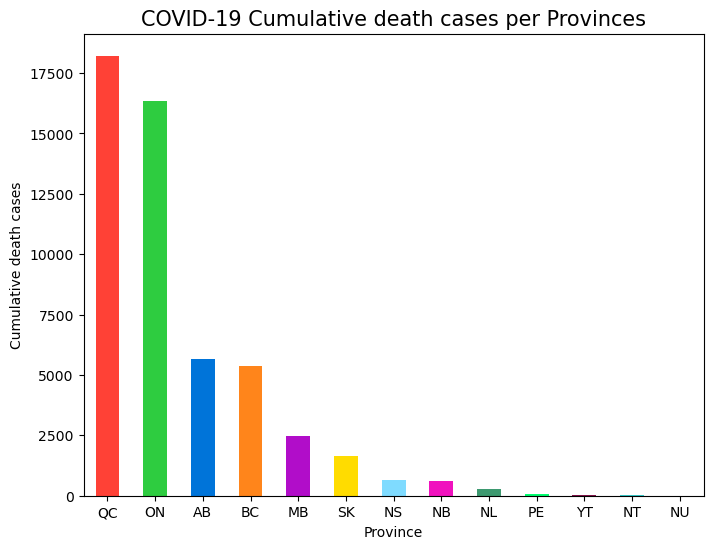

In [25]:
# set the colors for the bars
colors = ['#FF4136', '#2ECC40', '#0074D9', '#FF851B', '#B10DC9', '#FFDC00','#7FDBFF', '#F012BE', '#3D9970', '#01FF70', '#85144b', '#39CCCC', '#DDDDDD']
ax = Death_per_province_df.plot.bar(y='Cumulative death cases', figsize=(8,6), color = colors, rot=0, legend=None)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Cumulative death cases')
ax.set_title("COVID-19 Cumulative death cases per Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.savefig("Output/COVID-19 Cumulative death cases per Province.png")
plt.show()

# Confirmed cases per day by province

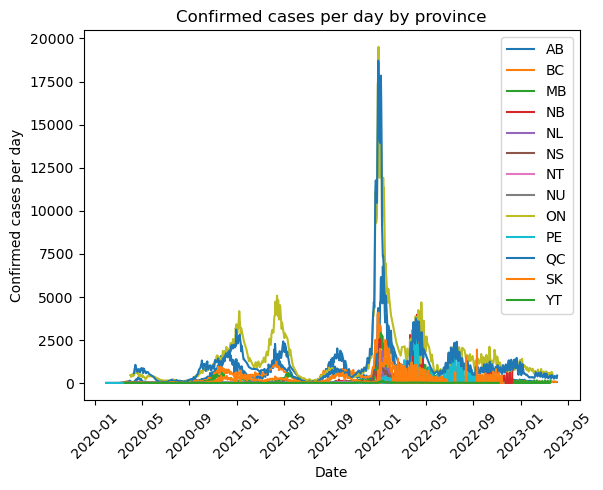

In [26]:
Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Confirmed cases per day']]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by province')
plt.legend()
# show the plot
plt.savefig("Output/Confirmed cases per day by province.png")
plt.show()

# Confirmed cases per day by top three provinces

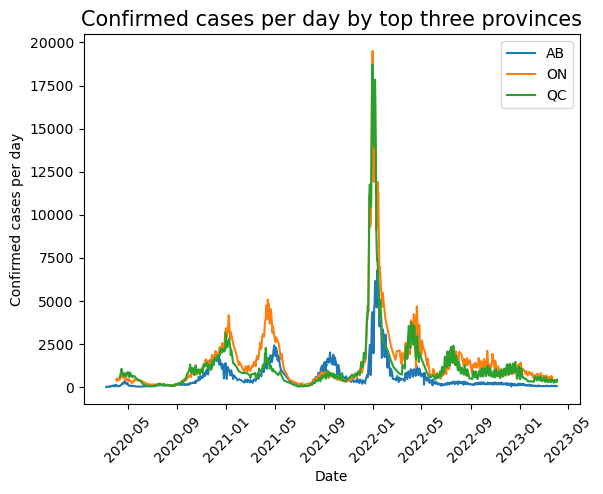

In [27]:
# calculate total confirmed cases for each province
totals = Line_plot_df.groupby('Province')['Confirmed cases per day'].sum().reset_index()
# sort by total confirmed cases and select top three provinces
top_three = totals.sort_values('Confirmed cases per day', ascending=False).head(3)['Province']
# filter dataframe to only include top three provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(top_three)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by top three provinces', size = 15)
plt.legend()
# show the plot
plt.savefig("Output/Confirmed cases per day by top three provinces.png")
plt.show()

# Confirmed cases per day by Individual provinces 

Enter desired provinces separated by commas: ON


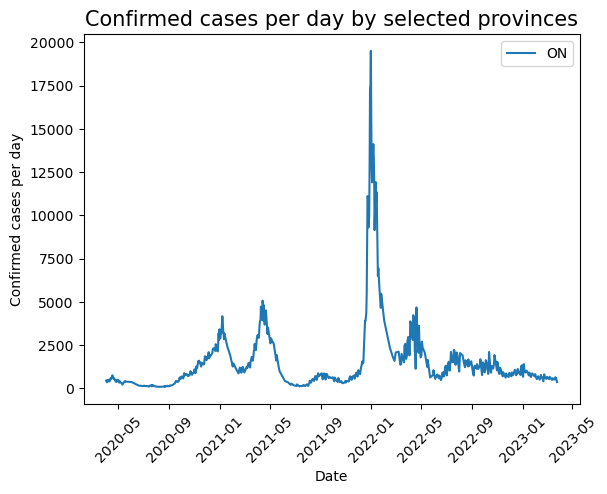

In [28]:
# allow user to input desired provinces
provinces = input("Enter desired provinces separated by commas: ").split(",")
# filter dataframe to only include desired provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(provinces)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by selected provinces', size =15)
plt.legend()
# show the plot
plt.savefig("Output/Confirmed cases per day by selected provinces.png")
plt.show()

# Cumulative confirmed cases by top three provinces

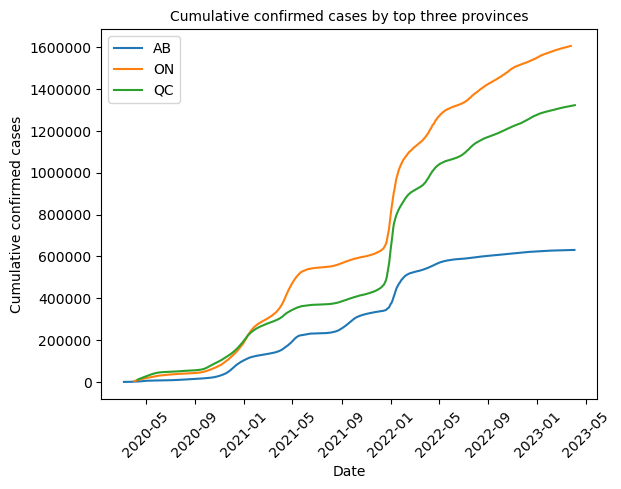

In [29]:
# calculate Cumulative confirmed cases confirmed cases for each province
cumulative_Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Cumulative confirmed cases']]
# sort by province and date
cumulative_Line_plot_df = cumulative_Line_plot_df.sort_values(['Province', 'Date'])
totals = cumulative_Line_plot_df.groupby('Province')['Cumulative confirmed cases'].sum().reset_index()
# sort by Cumulative confirmed cases and select top three provinces
top_three = totals.sort_values('Cumulative confirmed cases', ascending=False).head(3)['Province']
# filter dataframe to only include top three provinces
cumulative_Line_plot_df = cumulative_Line_plot_df[cumulative_Line_plot_df['Province'].isin(top_three)]
# sort by province and date
cumulative_Line_plot_df = cumulative_Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in cumulative_Line_plot_df.groupby('Province'):
    # plot Date vs Cumulative confirmed cases
    plt.plot(group['Date'], group['Cumulative confirmed cases'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative confirmed cases')
plt.yscale('linear')
plt.title('Cumulative confirmed cases by top three provinces', size = 10)
plt.legend()
# show the plot
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
plt.savefig("Output/Cumulative confirmed cases by top three provinces.png")
plt.show()

# Mortality Rate (%) per province

In [30]:
covid_dataframe_df.head(1)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Cumulative Active Cases,Active Cases per day
6294,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0,0,0


In [31]:
Mortality_rate_per_province = covid_dataframe_df.groupby('Province').max()[['Mortality rate', 'Date']].sort_values(['Mortality rate'], ascending = False).reset_index()
Mortality_rate_per_province = Mortality_rate_per_province[['Province', 'Mortality rate']]
Mortality_rate_per_province_df = Mortality_rate_per_province.set_index('Province')
Mortality_rate_per_province_df.head(1)

,Mortality rate
Province,
QC,11.679


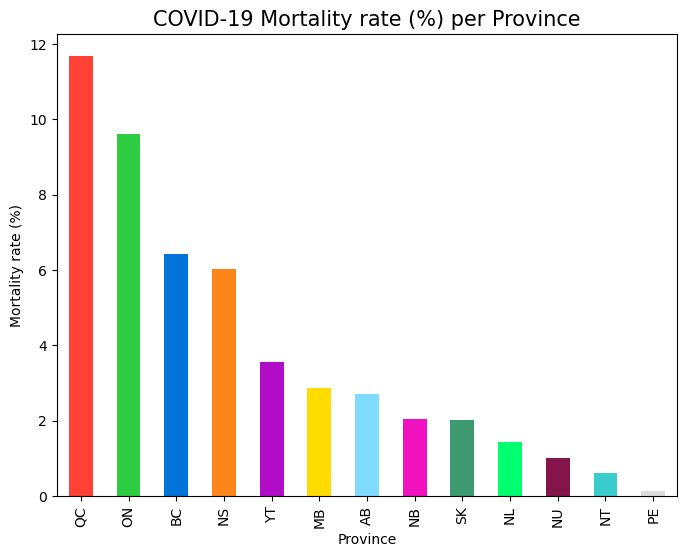

In [32]:
# set the colors for the bars
colors = ['#FF4136', '#2ECC40', '#0074D9', '#FF851B', '#B10DC9', '#FFDC00','#7FDBFF', '#F012BE', '#3D9970', '#01FF70', '#85144b', '#39CCCC', '#DDDDDD']
ax = Mortality_rate_per_province_df.plot.bar(y='Mortality rate', figsize=(8,6), color = colors, legend=None)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Mortality rate (%)')
ax.set_title("COVID-19 Mortality rate (%) per Province", size = 15)
# display the plot
plt.savefig("Output/COVID-19 Mortality rate per Province.png")
plt.show()

# Mortality rate vs Date per Province

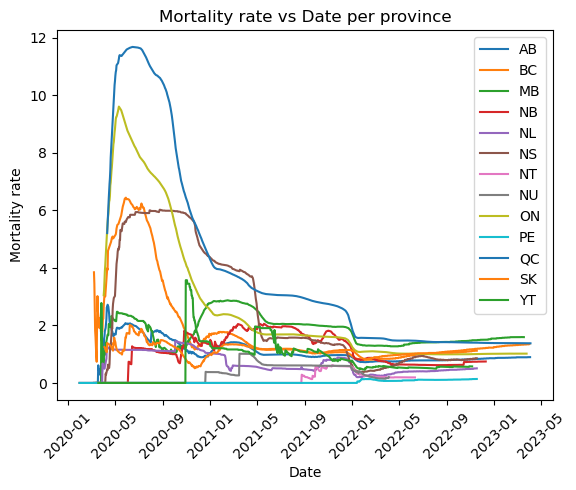

In [33]:
Mortality_rate_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Mortality rate']]
# sort by province and date
Mortality_rate_plot_df = Mortality_rate_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Mortality_rate_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Mortality rate'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Mortality rate')
plt.title('Mortality rate vs Date per province')
plt.legend()
# show the plot
plt.savefig("Output/Mortality rate vs Date per province.png")
plt.show()

# Cumulative Active Cases vs Date per province

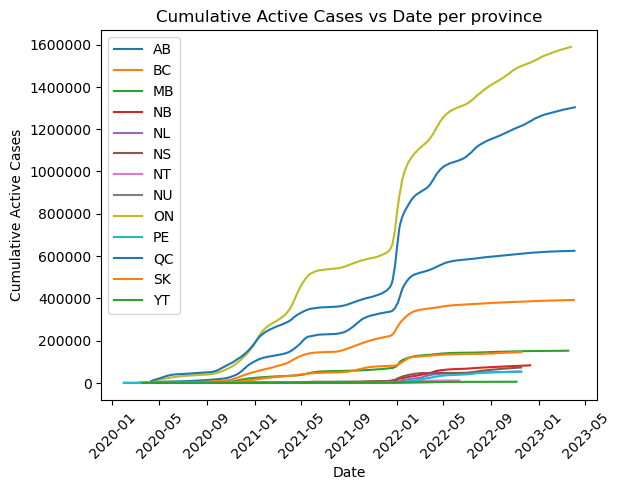

In [34]:
active_cases_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Cumulative Active Cases']]
# sort by province and date
active_cases_plot_df = active_cases_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in active_cases_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Cumulative Active Cases'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Active Cases')
plt.title('Cumulative Active Cases vs Date per province')
plt.legend()
# show the plot
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
plt.savefig("Output/Cumulative Active Cases vs Date per province.png")
plt.show()

# Active Cases per day vs Date per province

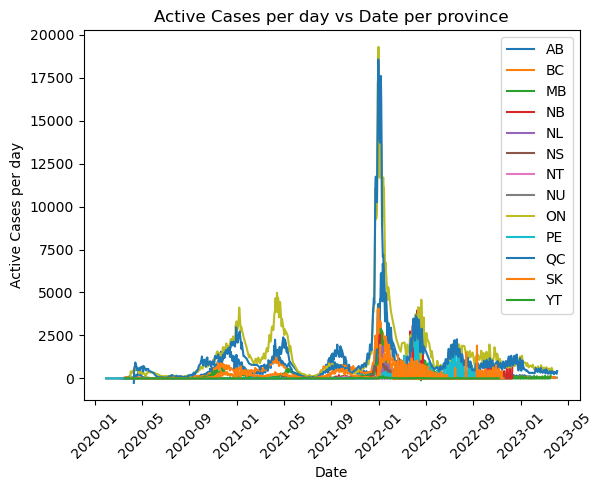

In [35]:
active_cases_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Active Cases per day']]
# sort by province and date
active_cases_plot_df = active_cases_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in active_cases_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Active Cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Active Cases per day')
plt.title('Active Cases per day vs Date per province')
plt.legend()
# show the plot
plt.savefig("Output/Active Cases per day vs Date per province.png")
plt.show()

# Active Cases per day by top three provinces

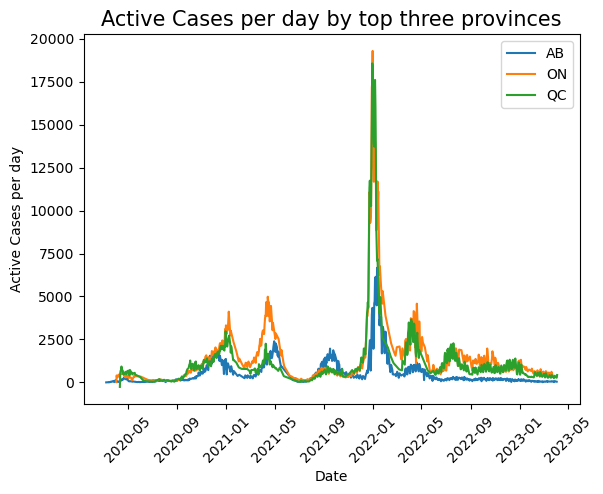

In [36]:
# calculate Active Cases per day for each province
active_cases_per_day_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Active Cases per day']]
totals = active_cases_per_day_plot_df.groupby('Province')['Active Cases per day'].sum().reset_index()
# sort by Active Cases per day and select top three provinces
top_three = totals.sort_values('Active Cases per day', ascending=False).head(3)['Province']
# filter dataframe to only include top three provinces
active_cases_per_day_plot_df = active_cases_per_day_plot_df[active_cases_per_day_plot_df['Province'].isin(top_three)]
# sort by province and date
active_cases_per_day_plot_df = active_cases_per_day_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in active_cases_per_day_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Active Cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Active Cases per day')
plt.title('Active Cases per day by top three provinces', size = 15)
plt.legend()
# show the plot
plt.savefig("Output/Active Cases per day by top three provinces.png")
plt.show()

# Correlation and Regression

In [40]:
print(st.pearsonr(covid_dataframe_df['Cumulative confirmed cases'], covid_dataframe_df['Confirmed cases per day']))
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dataframe_df['Cumulative confirmed cases'], covid_dataframe_df['Confirmed cases per day'])

PearsonRResult(statistic=0.3810679476312832, pvalue=0.0)


In [41]:
# Get regression values
regress_values = slope * covid_dataframe_df['Cumulative confirmed cases'] + intercept

In [42]:
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)

y = 0.0x + 110.96


The r-value is: 0.15


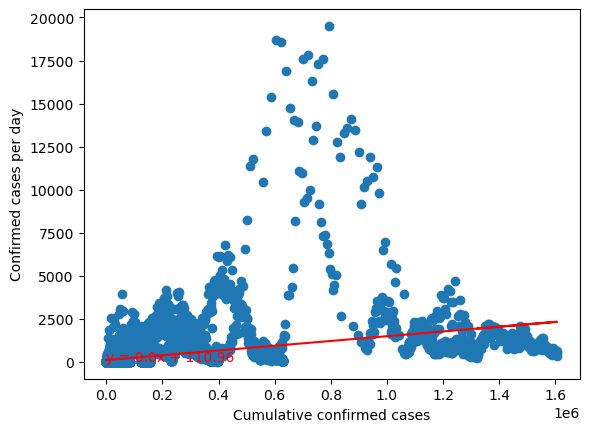

In [43]:
plt.scatter(covid_dataframe_df['Cumulative confirmed cases'], covid_dataframe_df['Confirmed cases per day'])
plt.xlabel("Cumulative confirmed cases")
plt.ylabel("Confirmed cases per day")
plt.plot(covid_dataframe_df['Cumulative confirmed cases'], regress_values, color='red')
# Label plot and annotate the line equation
plt.annotate(line_eq,(22,40),fontsize=10,color="red")
# Print r square value
print(f"The r-value is: {round(rvalue**2, 2)}")
# Show plot
plt.show()